In [164]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [165]:
data = pd.read_csv("https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/data/titanic_lab_sample.csv",
                   header=0,
                   names=['classe', 'sexo', 'idade', 'conj/irm', 'pai/crian', 'tarifa', 'sobrevivente'])
data.head()

,classe,sexo,idade,conj/irm,pai/crian,tarifa,sobrevivente
0,1,1,29.0000,0,0,211.3375,1
1,1,0,0.9167,1,2,151.5500,1
2,1,1,2.0000,1,2,151.5500,0
3,1,0,30.0000,1,2,151.5500,0
4,1,1,25.0000,1,2,151.5500,0


# Observações relevantes

A maioria dos sobreviventes estavam na primeira classe, porém houve mais sobreviventes na terceira classe do que na segunda (talvez pelo número maior de passageiros).

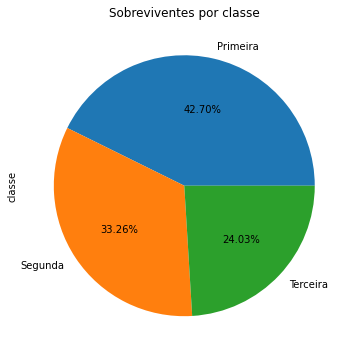

In [166]:
data.query('sobrevivente == 1')['classe'].value_counts().plot(kind='pie', title="Sobreviventes por classe",
                                                              autopct='%.2f%%',
                                                              figsize = (6,6), labels=['Primeira','Segunda', 'Terceira'])

#### A maioria dos sobreviventes eram do sexo masculino

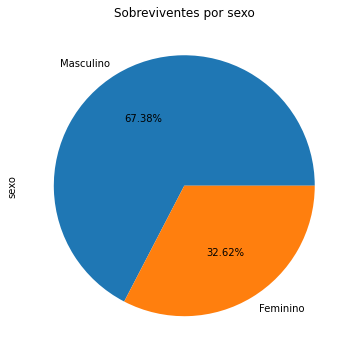

In [167]:
data.query('sobrevivente == 1')['sexo'].value_counts().plot(kind='pie',
                    title="Sobreviventes por sexo",
                    autopct='%.2f%%',
                    figsize = (6,6), labels=['Masculino','Feminino'])

#### Porém, proporcionalmente, o número de mulheres sobreviventes foi maior.

In [168]:
data['sobrevivente'][data["sexo"] == 1].value_counts()

1    314
0    115
Name: sobrevivente, dtype: int64

In [169]:
data['sobrevivente'][data["sexo"] == 0].value_counts()

0    527
1    152
Name: sobrevivente, dtype: int64

# Predições e resultados

### Colocando sobrevivente como alvo da predição

In [170]:
X = data.drop(['sobrevivente'], axis = 1)
y = data['sobrevivente']

#### Separando as bases de treino e de teste

In [171]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, shuffle=True)

In [172]:
model = LogisticRegression()
model.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
predicaoTreino = model.predict(X_treino)
predicaoTeste = model.predict(X_teste)
print("Acurácia treino: ",accuracy_score(y_treino, predicaoTreino))
print("Acurácia teste: ", accuracy_score(y_teste, predicaoTeste))

Acurácia treino:  0.7569193742478941
Acurácia teste:  0.7725631768953068


#### Matriz de confusão

In [176]:
confusion_matrix(y_teste, predicaoTeste)

array([[134,  27],
       [ 36,  80]])